(250,)


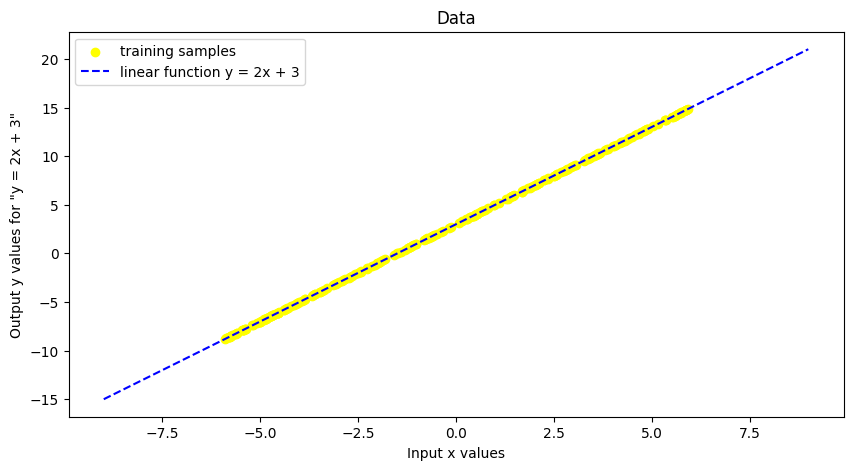

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


x_func = np.linspace(-9,9,100) #Return evenly spaced numbers over a specified interval
y_func = 2*x_func + 3

x_train = np.random.uniform(-6, 6, 250)
#y_train = 2*x_train + np.random.randn(*x_train.shape)*0.00 + 3
y_train = 2*x_train + 3

print(x_train.shape)


x_test = np.linspace(-10,10,1000)

fig, ax = plt.subplots(1,1,figsize=(10,5))
ax.scatter(x_train, y_train, label='training samples', color='yellow')
ax.plot(x_func, y_func, ls='--', label='linear function y = 2x + 3', color='blue')
ax.set_xlabel('Input x values')
ax.set_ylabel('Output y values for "y = 2x + 3"')
ax.legend()
ax.set_title('Data');
plt.show()


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

x_test = x_test.reshape(-1,1)
x_train = x_train.reshape(-1,1)
y_train = y_train.reshape(-1,1)

x_test_tensor = torch.from_numpy(x_test)
x_train_tensor = torch.from_numpy(x_train)
y_train_tensor = torch.from_numpy(y_train)

print(x_test_tensor.shape)
print(x_train_tensor.shape)
print(x_train_tensor.shape)



torch.Size([1000, 1])
torch.Size([250, 1])
torch.Size([250, 1])


In [ ]:
class MLP(nn.Module):
  '''
    Multilayer Perceptron for regression.
  '''
  def __init__(self):
    super().__init__()
    self.layers = nn.Sequential(
      nn.Linear(1, 20),
      nn.ReLU(),
      nn.Linear(20, 10),
      nn.ReLU(),
      nn.Linear(10, 1)
    )

  def forward(self, x):
    '''
      Forward pass
    '''
    return self.layers(x)

In [ ]:
mlp = MLP()
loss_function = nn.L1Loss()
optimizer = torch.optim.Adam(mlp.parameters(), lr=1e-3)

In [ ]:
import torch.utils.data as data_utils

train = data_utils.TensorDataset(x_train_tensor, y_train_tensor)
train_loader = data_utils.DataLoader(train, batch_size=50, shuffle=True)

In [ ]:
for epoch in range(0, 45): # 5 epochs at maximum
  print(f'Starting epoch {epoch+1}')
  current_loss = 0.0
  for i, data in enumerate(train_loader, 0):
    inputs, targets = data
    inputs, targets = inputs.float(), targets.float()
    targets = targets.reshape((targets.shape[0], 1))
    optimizer.zero_grad()
    outputs = mlp(inputs)
    loss = loss_function(outputs, targets)
    loss.backward()
    optimizer.step()
    current_loss += loss.item()
    if i % 100 == 0:
      print('Loss after mini-batch %5d: %.3f' %
                (i + 1, current_loss / 500))
      current_loss = 0.0

print('Training process has finished.')


Starting epoch 1
Loss after mini-batch     1: 0.013
Starting epoch 2
Loss after mini-batch     1: 0.013
Starting epoch 3
Loss after mini-batch     1: 0.013
Starting epoch 4
Loss after mini-batch     1: 0.013
Starting epoch 5
Loss after mini-batch     1: 0.011
Starting epoch 6
Loss after mini-batch     1: 0.013
Starting epoch 7
Loss after mini-batch     1: 0.012
Starting epoch 8
Loss after mini-batch     1: 0.012
Starting epoch 9
Loss after mini-batch     1: 0.012
Starting epoch 10
Loss after mini-batch     1: 0.011
Starting epoch 11
Loss after mini-batch     1: 0.010
Starting epoch 12
Loss after mini-batch     1: 0.012
Starting epoch 13
Loss after mini-batch     1: 0.012
Starting epoch 14
Loss after mini-batch     1: 0.011
Starting epoch 15
Loss after mini-batch     1: 0.009
Starting epoch 16
Loss after mini-batch     1: 0.009
Starting epoch 17
Loss after mini-batch     1: 0.010
Starting epoch 18
Loss after mini-batch     1: 0.008
Starting epoch 19
Loss after mini-batch     1: 0.008
St

In [ ]:
print(mlp(x_test_tensor.view(-1,1).float()).shape)

torch.Size([1000, 1])


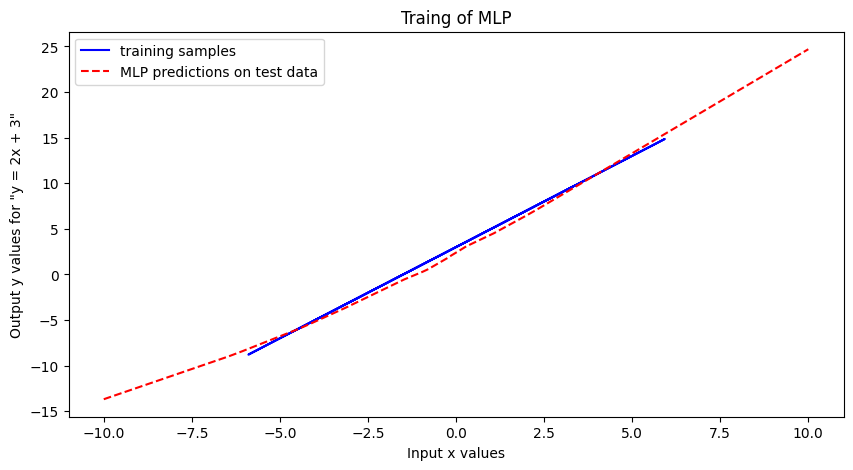

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(10,5))
ax.plot(x_train, y_train, label='training samples', color='blue')
ax.plot(x_test_tensor.view(-1).detach().numpy(), mlp(x_test_tensor.view(-1,1).float()).view(-1).detach().numpy(), ls='--', label='MLP predictions on test data', color='red')
ax.set_xlabel('Input x values')
ax.set_ylabel('Output y values for "y = 2x + 3"')
ax.legend()
ax.set_title('Traing of MLP');
plt.show()